# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 0


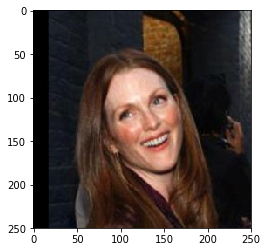

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[56])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)
* Detected faces Percentage on `human_files_short`:  98.0 %
* Detected faces Percentage on `dog_files_short`:  17.0 %

In [4]:
from tqdm import tqdm


human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

def percentage_detection(paths):
    counter_imgs = 0
    counter_faces = 0
    for i in tqdm(paths):
        counter_imgs += 1
        n = face_detector(i)
        if n is True:
            counter_faces += 1
    return 100 * counter_faces / counter_imgs

perc1 = percentage_detection(human_files_short)
print('Percentage of faces detected on human files: ', perc1, '%')

perc2 = percentage_detection(dog_files_short)
print('Percentage of faces detected on dog files: ', perc2, '%')


  0%|          | 0/100 [00:00<?, ?it/s]

Percentage of faces detected on human files:  98.0 %


100%|██████████| 100/100 [00:29<00:00,  3.34it/s]

Percentage of faces detected on dog files:  17.0 %


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [5]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:36<00:00, 15002063.37it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [6]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    # Load the image from path using cv2 library
    img = cv2.imread(img_path)
    
    # Create the normalize object based on the values read on the documentation
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
    
    # Create the transformation object that include resizing the image in a square fashion fitting the VGG input
    # transforming the image in a torch tensor and normalizing it
    preprocess = transforms.Compose([transforms.ToPILImage(),
                                     transforms.RandomResizedCrop(224),
                                     transforms.ToTensor(), 
                                     normalize])
    
    # Apply the transformations
    img = preprocess(img)
    
    # Check if gpu is activated
    if use_cuda:
        img = img.cuda()
    
    # Get the image dimensions in the right order to fit into the model
    img.unsqueeze_(0)
    
    # Forward pass on the VGG16
    output = VGG16(img)
    
    # Output probabilities are transformed into the classified index using the argmax() function
    class_index = output.cpu().data.numpy().argmax()
    
    return class_index # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [7]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    class_index = VGG16_predict(img_path)
    
    if (class_index >= 151 and class_index <= 268):
        return True
    else:
        return False
    
    #return None # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
* Percentage of dogs detected on `human files_short`:  3.0 %
* Percentage of dogs detected on `dog files_short`:  94.0 %

In [8]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
def percentage_detectionv2(paths):
    counter_imgs = 0
    counter_dogs = 0
    for i in tqdm(paths):
        counter_imgs += 1
        n = dog_detector(i)
        if n is True:
            counter_dogs += 1
    return 100 * counter_dogs / counter_imgs

perc1 = percentage_detectionv2(human_files_short)
print('Percentage of dogs detected on human files: ', perc1, '%')

perc2 = percentage_detectionv2(dog_files_short)
print('Percentage of dogs detected on dog files: ', perc2, '%')

  3%|▎         | 3/100 [00:00<00:03, 27.12it/s]

Percentage of dogs detected on human files:  2.0 %


100%|██████████| 100/100 [00:04<00:00, 25.94it/s]

Percentage of dogs detected on dog files:  93.0 %


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [9]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

# define VGG16 model
alexnet = models.alexnet(pretrained = True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    ResNet = alexnet.cuda()

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.torch/models/alexnet-owt-4df8aa71.pth
100%|██████████| 244418560/244418560 [00:15<00:00, 16143989.80it/s]


In [10]:
def ALEXNET_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    # Load the image from path using cv2 library
    img = cv2.imread(img_path)
    
    # Create the normalize object based on the values read on the documentation
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
    
    # Create the transformation object that include resizing the image in a square fashion fitting the VGG input
    # transforming the image in a torch tensor and normalizing it
    preprocess = transforms.Compose([transforms.ToPILImage(),
                                     transforms.RandomResizedCrop(224),
                                     transforms.ToTensor(), 
                                     normalize])
    
    # Apply the transformations
    img = preprocess(img)
    
    # Check if gpu is activated
    if use_cuda:
        img = img.cuda()
    
    # Get the image dimensions in the right order to fit into the model
    img.unsqueeze_(0)
    
    # Forward pass on the VGG16
    output = alexnet(img)
    
    # Output probabilities are transformed into the classified index using the argmax() function
    class_index = output.cpu().data.numpy().argmax()
    
    return class_index # predicted class index

In [11]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detectorv2(img_path):
    ## TODO: Complete the function.
    class_index = ALEXNET_predict(img_path)
    
    if (class_index >= 151 and class_index <= 268):
        return True
    else:
        return False
    
    #return None # true/false
    
def percentage_detectionv3(paths):
    counter_imgs = 0
    counter_dogs = 0
    for i in tqdm(paths):
        counter_imgs += 1
        n = dog_detectorv2(i)
        if n is True:
            counter_dogs += 1
    return 100 * counter_dogs / counter_imgs

perc1 = percentage_detectionv3(human_files_short)
print('Percentage of dogs detected on human files: ', perc1, '%')

perc2 = percentage_detectionv3(dog_files_short)
print('Percentage of dogs detected on dog files: ', perc2, '%')

  4%|▍         | 4/100 [00:00<00:04, 20.09it/s]

Percentage of dogs detected on human files:  7.0 %


100%|██████████| 100/100 [00:02<00:00, 43.97it/s]

Percentage of dogs detected on dog files:  81.0 %


__Answer (Optional - Question 2):__ 
* Percentage of dogs detected on `human files_short`:  9.0 %
* Percentage of dogs detected on `dog files_short`:  83.0 %

**AlexNet results worst than VGG16 for this task**

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [2]:
# MISS THIS IN CASE GENERATE CONFUSION
# I ADD DUPLICATED LIBRARIES FOR A MORE SUITABLE HANDLE OF GPU PROJECT PARTS

# Import libraries
from PIL import Image
from PIL import ImageFile
import torchvision.transforms as transforms

import torch
import torchvision.models as models

from tqdm import tqdm

import numpy as np
from glob import glob

# check if CUDA is available
use_cuda = torch.cuda.is_available()
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [3]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
# define training and test data directories

# Define the directory where the data is stored
data_dir = '/data/dog_images/'

train_data = os.path.join(data_dir, 'train/')
test_data = os.path.join(data_dir, 'test/')
valid_data = os.path.join(data_dir, 'valid/')

# Transformation
data_transform_train = transforms.Compose([
                                    transforms.Resize((224, 224)), 
                                    transforms.RandomHorizontalFlip(), # randomly flip and rotate
                                    transforms.RandomRotation(10),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

data_transform_other = transforms.Compose([
                                    transforms.Resize((224, 224)),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_data = datasets.ImageFolder(train_data, transform = data_transform_train)
test_data = datasets.ImageFolder(test_data, transform = data_transform_other)
valid_data = datasets.ImageFolder(valid_data, transform = data_transform_other)

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)

loaders_scratch = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

# print out some data stats
print('Num training images: ', len(train_data))
print('Num test images: ', len(test_data))
print('Num validation images: ', len(valid_data))

Num training images:  6680
Num test images:  836
Num validation images:  835


Let´s check out a subset of the resulting images...

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image   

Labels tensor([ 104,   39,   39,   91,   45,   57,   40,   22,   71,   86,
          27,   60,    8,   50,   88,  111,    7,   91,   33,  124])


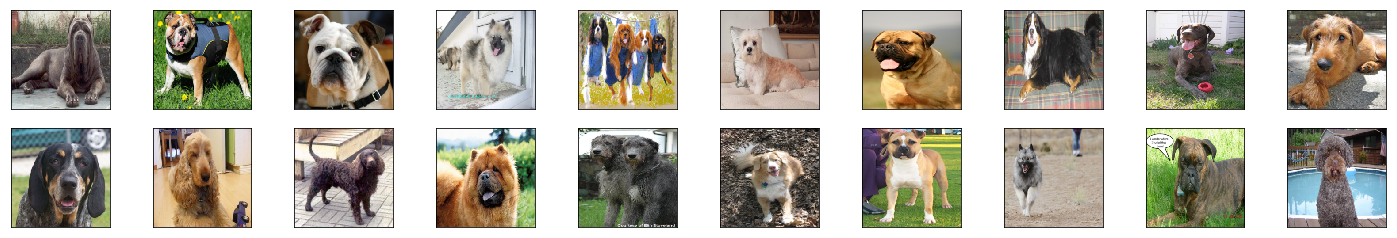

In [5]:
# obtain one batch of training images
dataiter = iter(test_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

print('Labels', labels.data)

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))

# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
        
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?



**Answer**:

    I did resize the images by interpolating the neirest neighbour pixels to 224. The reason why I got this number is because the pre-tained model are also using these amount of pixel information. Cropping is not a good idea because we can randomly remove relevant parts from the dog. In other word, we will be missing information from our data set.
    
    I did augmented by flipping horizontally and giving tiny random rotations (10 degrees). This does generate a data set that is formally similar to the original one been able to augment data.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [6]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        # convolutional layer 
        self.conv1 = nn.Conv2d(3, 16, 2, padding=1)
        # convolutional layer 
        self.conv2 = nn.Conv2d(16, 32, 2, padding=1)
        # convolutional layer 
        self.conv3 = nn.Conv2d(32, 64, 2, padding=1)
        # convolutional layer 
        self.conv4 = nn.Conv2d(64, 128, 2, padding=1)
        # max pooling layer
        self.pool3 = nn.MaxPool2d(3, 3)
        # max pooling layer
        self.pool2 = nn.MaxPool2d(2, 2)
        # linear layer (128 * 9 * 9 -> 133)
        self.fc1 = nn.Linear(128 * 9 * 9, 133)
        # dropout layer (p=0.2)
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        ## Define forward behavior
        # add sequence of convolutional and max pooling layers
        x = self.pool2(F.relu(self.conv1(x)))
        # add dropout layer
        x = self.dropout(x)
        x = self.pool2(F.relu(self.conv2(x)))
        # add dropout layer
        x = self.dropout(x)
        x = self.pool2(F.relu(self.conv3(x)))
        # add dropout layer
        x = self.dropout(x)
        x = self.pool3(F.relu(self.conv4(x)))
        # add dropout layer
        x = self.dropout(x)
        # flatten image input
        x = x.view(-1, 128 * 9 * 9)
        # add dropout layer
        x = self.dropout(x)
        # add 1st hidden layer, with relu activation function
        x = self.fc1(x)
        
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

I did create a deep convolutional network with 4 **convolutional layers** and 1 **fully connected** at the end. I did inspireme on some research papers found on internet. However, I did tried several architectures ending with this one because it was closer to the target. On each conv layer I did a max pooling and dropout to reduce the dimensions and substract average information from the filter pixels and to reduce overfitting impact. I did make sure the index math were correctly propageted to the fully connected layers. 

Between Convolution region and fully connected, the filter is flattened to match the input of the fully connected layer. On the fully connected I did use a dropout of 0.2 as well to prevent overfitting or saturing some weights respect to others.

Regarging the filters to be learned they are standard 2x2 with same stride and padding and the number of filters is duplicated on each conv layer. The max pooling on the first 3 conv layer are (2, 2) and the last one is (3, 3). This is again inspired on my internet search for posible architectures.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [7]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch =  nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.003)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [16]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in tqdm(range(1, n_epochs+1)):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            
            # forward pass
            output = model(data)

            # calculate the batch loss
            loss = criterion(output, target)
            
            # backward pass
            loss.backward()
            
            # perform a single optimization step (parameter update)
            optimizer.step()
            
            # update training loss according to what was asked
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            
        ######################    
        # validate the model #
        ######################
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            
            # forward pass
            output = model(data)
            
            # calculate the batch loss
            loss = criterion(output, target)
            
            # update average validation loss 
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
   
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        # save model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss            
    # return trained model
    return model


# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

# train the model
model_scratch = train(10, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

 10%|█         | 1/10 [01:35<14:18, 95.37s/it]

Epoch: 1 	Training Loss: 3.490490 	Validation Loss: 4.229127
Validation loss decreased (inf --> 4.229127).  Saving model ...


 20%|██        | 2/10 [03:11<12:44, 95.51s/it]

Epoch: 2 	Training Loss: 3.470770 	Validation Loss: 4.203149
Validation loss decreased (4.229127 --> 4.203149).  Saving model ...


 30%|███       | 3/10 [04:47<11:11, 95.86s/it]

Epoch: 3 	Training Loss: 3.434115 	Validation Loss: 4.252729


 40%|████      | 4/10 [06:24<09:36, 96.03s/it]

Epoch: 4 	Training Loss: 3.417005 	Validation Loss: 4.218843


 50%|█████     | 5/10 [08:00<08:00, 96.19s/it]

Epoch: 5 	Training Loss: 3.385361 	Validation Loss: 4.219049


 60%|██████    | 6/10 [09:37<06:25, 96.34s/it]

Epoch: 6 	Training Loss: 3.349773 	Validation Loss: 4.202222
Validation loss decreased (4.203149 --> 4.202222).  Saving model ...


 70%|███████   | 7/10 [11:14<04:49, 96.64s/it]

Epoch: 7 	Training Loss: 3.326033 	Validation Loss: 4.219325


 80%|████████  | 8/10 [12:52<03:13, 96.86s/it]

Epoch: 8 	Training Loss: 3.287715 	Validation Loss: 4.257379


 90%|█████████ | 9/10 [14:29<01:36, 96.96s/it]

Epoch: 9 	Training Loss: 3.249086 	Validation Loss: 4.261174


100%|██████████| 10/10 [16:06<00:00, 96.90s/it]

Epoch: 10 	Training Loss: 3.226390 	Validation Loss: 4.234786


**NOTE**: PREVIOUS TRAINING SEQUENCE DOESN´T REPRESENT THE WHOLE TRAINING. I DID LOAD PREVIOUS TRAINING TO TRAIN A BIT BETTER AND FIND A BETTER RESULTS IN TEST.

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [20]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# load the model that got the best validation accuracy
#model_scratch.load_state_dict(torch.load('model_scratch.pt'))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 4.183579


Test Accuracy: 10% (87/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [24]:
## TODO: Specify data loaders

import os
from torchvision import datasets

# Define the directory where the data is stored
data_dir = '/data/dog_images/'

train_data = os.path.join(data_dir, 'train/')
test_data = os.path.join(data_dir, 'test/')
valid_data = os.path.join(data_dir, 'valid/')

# Transformation
data_transform = transforms.Compose([
                                    transforms.Resize((224, 224)), 
                                    transforms.RandomHorizontalFlip(), # randomly flip and rotate
                                    transforms.RandomRotation(10),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_data = datasets.ImageFolder(train_data, transform = data_transform)
test_data = datasets.ImageFolder(test_data, transform = data_transform)
valid_data = datasets.ImageFolder(valid_data, transform = data_transform)

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)

loaders_transfer = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

# print out some data stats
print('Num training images: ', len(train_data))
print('Num test images: ', len(test_data))
print('Num validation images: ', len(valid_data))

Num training images:  6680
Num test images:  836
Num validation images:  835


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [25]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 

# Load the pretrained model from pytorch
model_transfer = models.vgg19(pretrained=True)

# print out the model structure
print(model_transfer)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.torch/models/vgg19-dcbb9e9d.pth
100%|██████████| 574673361/574673361 [00:37<00:00, 15411334.84it/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (17): ReLU(inplace)

In [26]:
# Freeze training for all "features" layers
for param in model_transfer.features.parameters():
    param.require_grad = False

n_inputs = model_transfer.classifier[6].in_features

# add last linear layer (n_inputs -> 5 flower classes)
# new layers automatically have requires_grad = True
last_layer = nn.Linear(n_inputs, 133)

model_transfer.classifier[6] = last_layer

if use_cuda:
    model_transfer = model_transfer.cuda()

# check to see that your last layer produces the expected number of outputs
print(model_transfer.classifier[6].out_features) 

133


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
I did load the vgg19 to give a try because I have been always using 16 instead. VGG19 is slightly heavier and contains 3 more weight layers. Since I have really bad experience getting >10% accuracy on my architecture I tried to go a little bit deeper in this one.

There is also a reason to use VGG. It was good to detect dog so I assume that is better than other architectures in classifying dog breeds.

Then, I freezed all the features layers and then changed the n_output of the last fully connected layer to match our problem. This one was automatically set to to be train during the training process.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [27]:
import torch.optim as optim

criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [10]:
# train the model
n_epochs = 10
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 	Training Loss: 4.086975 	Validation Loss: 3.059511
Validation loss decreased (inf --> 3.059511).  Saving model ...


 10%|█         | 1/10 [08:30<1:16:33, 510.36s/it]

Epoch: 2 	Training Loss: 2.191376 	Validation Loss: 1.687551
Validation loss decreased (3.059511 --> 1.687551).  Saving model ...


 20%|██        | 2/10 [17:00<1:08:01, 510.21s/it]

Epoch: 3 	Training Loss: 1.339640 	Validation Loss: 1.262124
Validation loss decreased (1.687551 --> 1.262124).  Saving model ...


 30%|███       | 3/10 [25:30<59:30, 510.14s/it]  

Epoch: 4 	Training Loss: 1.065109 	Validation Loss: 1.092709
Validation loss decreased (1.262124 --> 1.092709).  Saving model ...


 40%|████      | 4/10 [33:59<50:59, 509.96s/it]

Epoch: 5 	Training Loss: 0.917959 	Validation Loss: 1.010318
Validation loss decreased (1.092709 --> 1.010318).  Saving model ...


 50%|█████     | 5/10 [42:29<42:29, 509.85s/it]

Epoch: 6 	Training Loss: 0.812348 	Validation Loss: 0.928188
Validation loss decreased (1.010318 --> 0.928188).  Saving model ...


 60%|██████    | 6/10 [50:58<33:59, 509.77s/it]

Epoch: 7 	Training Loss: 0.750472 	Validation Loss: 0.920614
Validation loss decreased (0.928188 --> 0.920614).  Saving model ...


 70%|███████   | 7/10 [59:28<25:29, 509.77s/it]

Epoch: 8 	Training Loss: 0.713156 	Validation Loss: 0.838783
Validation loss decreased (0.920614 --> 0.838783).  Saving model ...


 80%|████████  | 8/10 [1:07:58<16:59, 509.75s/it]

Epoch: 9 	Training Loss: 0.662657 	Validation Loss: 0.834456
Validation loss decreased (0.838783 --> 0.834456).  Saving model ...


 90%|█████████ | 9/10 [1:16:28<08:29, 509.77s/it]

Epoch: 10 	Training Loss: 0.618731 	Validation Loss: 0.823410
Validation loss decreased (0.834456 --> 0.823410).  Saving model ...


100%|██████████| 10/10 [1:24:57<00:00, 509.73s/it]


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [28]:
### load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt', map_location=lambda storage, loc: storage))

test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.792407


Test Accuracy: 73% (612/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [29]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_data.classes]

    
def predict_breed_transfer(img_path):
    # load the image and return the predicted breed

    # Load the image from path using cv2 library
    image = cv2.imread(img_path)
    
    # Create the transformation object that include resizing the image in a square fashion fitting the VGG input
    # transforming the image in a torch tensor and normalizing it
    preprocess = transforms.Compose([transforms.ToPILImage(),
                                    transforms.Resize((224, 224)), 
                                    transforms.RandomHorizontalFlip(), # randomly flip and rotate
                                    transforms.RandomRotation(10),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    
    img = preprocess(image)
    
    # move model inputs to cuda, if GPU available
    if use_cuda:
        img = img.cuda() 
    
    img.unsqueeze_(0)
    
    # forward move
    output = model_transfer(img)

    # convert output probabilities to predicted class
    _, preds_tensor = torch.max(output, 1)
    preds = np.squeeze(preds_tensor.numpy()) if not use_cuda else np.squeeze(preds_tensor.cpu().numpy())

    # Plot result
    fig = plt.figure(figsize=(25, 4))
    ax = fig.add_subplot(xticks=[], yticks=[])
    #print(image.shape)
    plt.imshow(image)
    print('DOG BREED PREDICTED:', class_names[preds])
                 
    return None

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [30]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    l1 = face_detector(img_path)
    l2 = dog_detector(img_path)
    
    if l1 is True and l2 is not True:
        predict_breed_transfer(img_path)
        print('This is a human with doggie face!')
        real_class = img_path.split("/")
        print('IMAGE CONTAINS: ', real_class[4])
    elif l2 is True and l1 is not True:
        predict_breed_transfer(img_path)
        print('Such a beautifull dog!')
        real_class = img_path.split("/")
        print('IMAGE CONTAINS: ', real_class[5])
    elif l1 and l2 is True:
        predict_breed_transfer(img_path)
        print('I can tell this human is amazed by the dog!')
        real_class = img_path.split("/")
        print('IMAGE CONTAINS: ', real_class[5])
    else:
        print('Sorry but your image seems to be dog-free and human-free! :p')
       
    return None


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 

I prefer to use the dataset image we are working with.

I did try to run the app several time and I was expecting better accuracy. I found very interesting that dog breed associated to human_files are kind of matching some features from the image like curly hair.

For the dog_files I can it see that the errors are more asociated to the position of the dog. Like for example the image witht he dog standing up on the 4 legs match typically to dogs that are toll and slim so I assuming it is paying attention to the leg presence in the image.

I will try to find a more specific architecture for this problem (i don´t wanna run out of gpu)

I will try to do some more augmentation on the images

For the seek of good accuracy, I will try to put it in production using transfer learning and train more fully connected layers.

DOG BREED PREDICTED: Collie
This is a human with doggie face!
IMAGE CONTAINS:  Dan_Ackroyd_0001.jpg
DOG BREED PREDICTED: Dachshund
This is a human with doggie face!
IMAGE CONTAINS:  Alex_Corretja_0001.jpg
DOG BREED PREDICTED: Alaskan malamute
This is a human with doggie face!
IMAGE CONTAINS:  Daniele_Bergamin_0001.jpg
DOG BREED PREDICTED: Neapolitan mastiff
Such a beautifull dog!
IMAGE CONTAINS:  Mastiff_06833.jpg
DOG BREED PREDICTED: Anatolian shepherd dog
Such a beautifull dog!
IMAGE CONTAINS:  Mastiff_06826.jpg
DOG BREED PREDICTED: Cane corso
Such a beautifull dog!
IMAGE CONTAINS:  Mastiff_06871.jpg


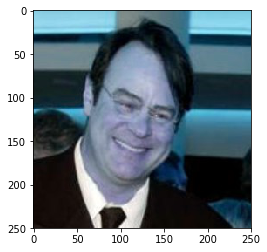

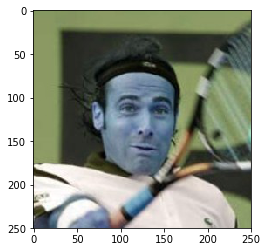

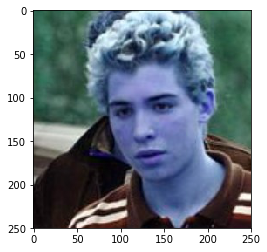

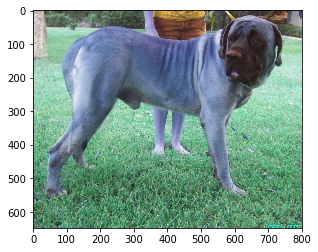

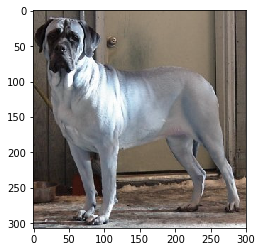

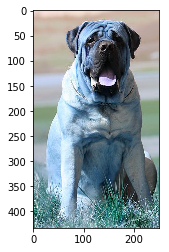

In [31]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

import numpy as np
from glob import glob

# load filenames for human and dog images
path_img = "/personal_images/*"
#personal_files = np.array(glob(path_img))

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)